In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import make_scorer
import xgboost as xg

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [67]:
#read dataset
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,...,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,...,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,...,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,...,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,...,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [68]:
# check type of dataset and count how many non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [69]:
print("Name of all the columns: ", list(df.columns))

Name of all the columns:  ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


## Checking missing values

In [70]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# G3 the variables we will try to predict

[Text(0.5, 1.0, 'Final Grades')]

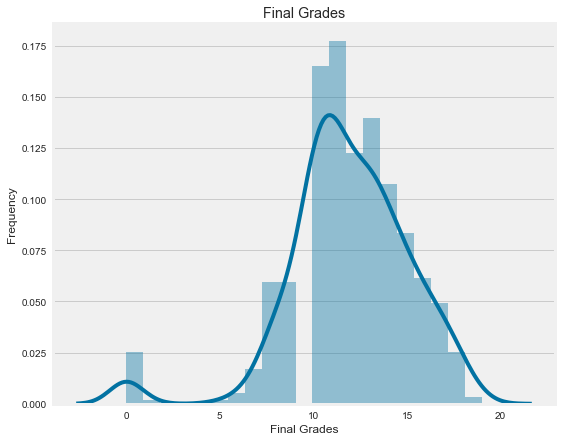

In [71]:
fig, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
ax = sns.distplot(df['G3'], color="b");
ax.xaxis.grid(False)
ax.set_ylabel("Frequency")
ax.set_xlabel("Final Grades")
ax.set(title="Final Grades")


In [72]:
# Skew and kurt
print(f"Skewness: {df['G3'].skew()}")
print(f"Kurtosis: {df['G3'].kurt()}")

Skewness: -0.9129093547157225
Kurtosis: 2.7122043191041723


### G3 is normalized, we do not have to modify anything

### G2 and G1 are strongly correlated with G3, we will excluding them in order to avoid overfitting

## Count number of male and female students

Text(0.5, 1.0, 'Distribution of gender')

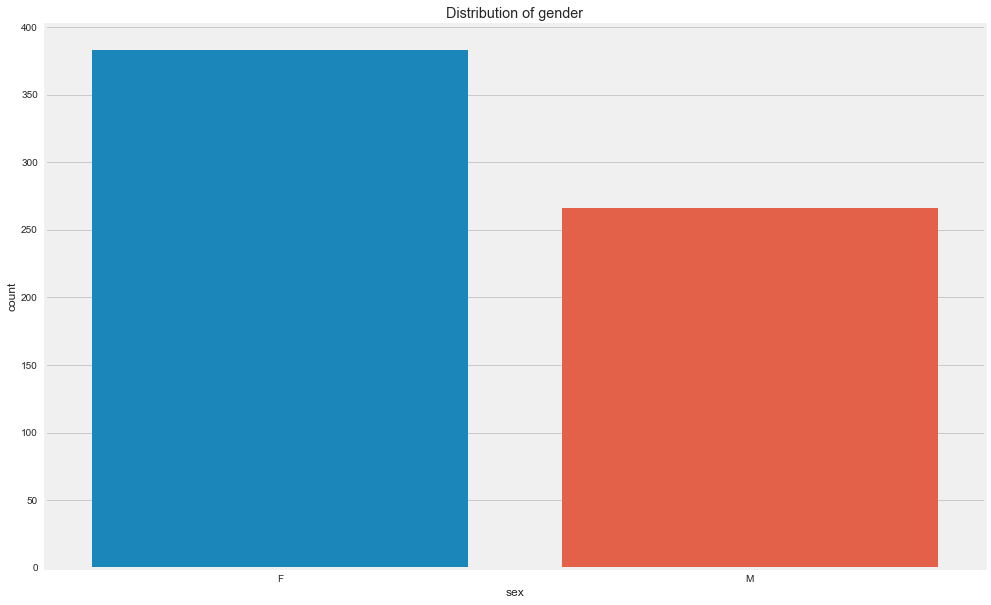

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = "sex", data=df)
ax.set_title("Distribution of gender")


## Distribution of ages

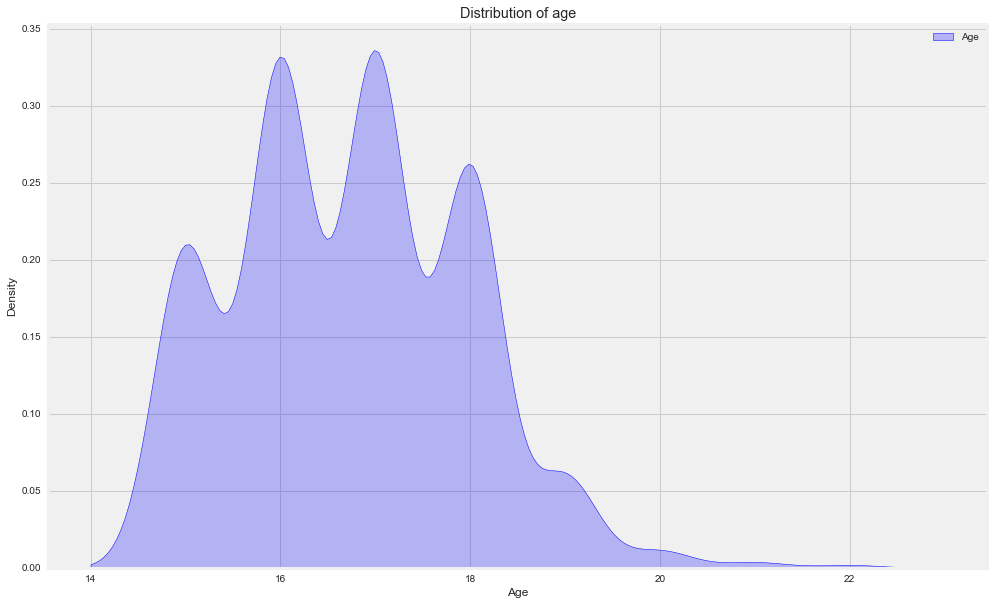

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.kdeplot(x = "age", data=df, color="blue", shade=True, Label="Age")
ax.set_title("Distribution of age")
ax.set_xlabel('Age')
ax.legend()

## Grade distribution vs address

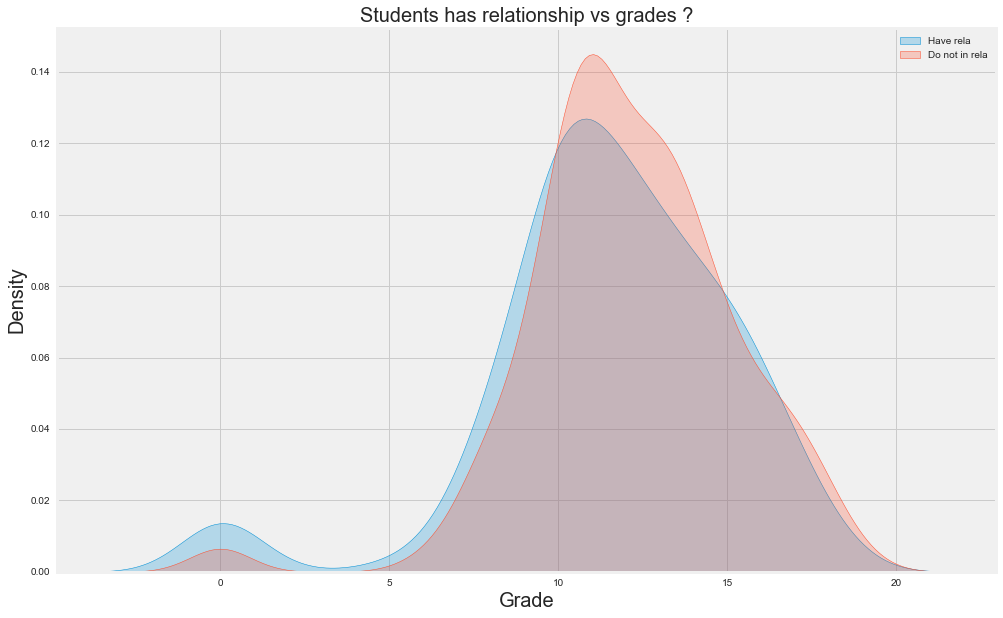

In [75]:
# Grade distribution by address
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(df.loc[df['romantic'] == 'yes', 'G3'], label='Have rela', shade = True)
sns.kdeplot(df.loc[df['romantic'] == 'no', 'G3'], label='Do not in rela', shade = True)
ax.set_title('Students has relationship vs grades ?', fontsize = 20)
ax.set_xlabel('Grade', fontsize = 20);
ax.set_ylabel('Density', fontsize = 20)
ax.legend()

# Do students have relationship perform better than students do not have?

Text(0, 0.5, 'Density')

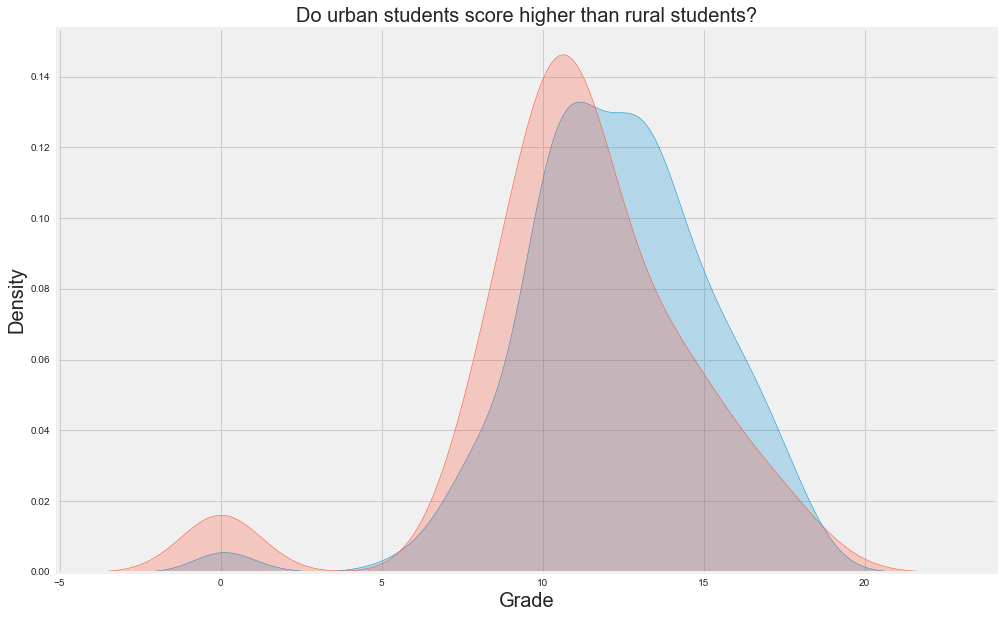

In [76]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
ax.set_title('Do urban students score higher than rural students?', fontsize = 20)
ax.set_xlabel('Grade', fontsize = 20);
ax.set_ylabel('Density', fontsize = 20)

# Does father and mother's education affect the students' grades?

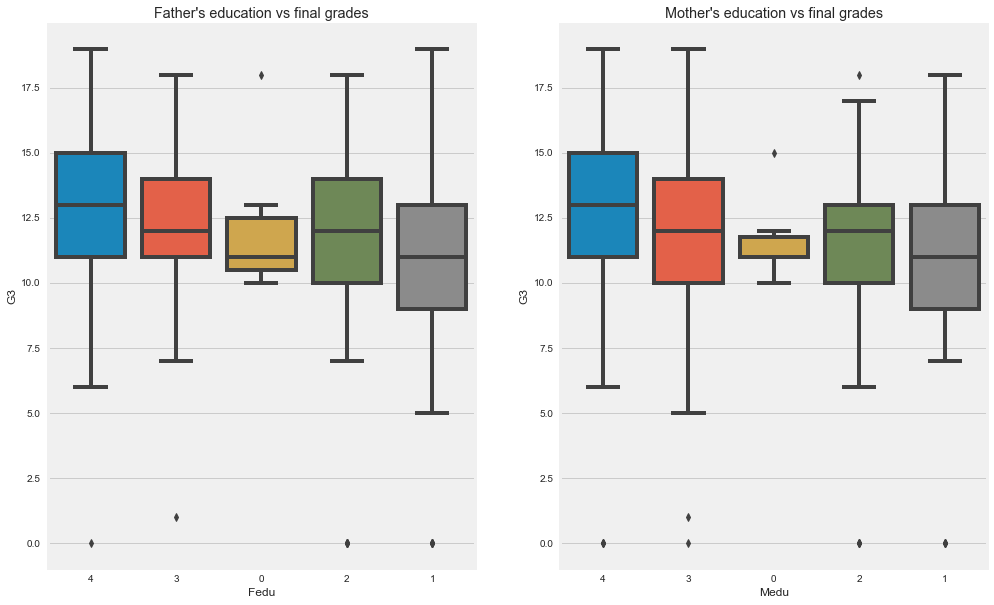

In [77]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
order_by = df.groupby("Fedu")['G3'].mean().sort_values(ascending = False).index
ax[0] = sns.boxplot(x = df["Fedu"], y = df['G3'], order = order_by, ax=ax[0])
ax[0].set_title("Father's education vs final grades")

order_by1 = df.groupby("Medu")['G3'].mean().sort_values(ascending = False).index
ax[1] = sns.boxplot(x = df["Medu"], y = df['G3'], order = order_by1, ax=ax[1])
ax[1].set_title("Mother's education vs final grades")

plt.show()

### Out of nowhere, student's who parents do not have education(0) perform nearly the same as those whose parents have higher education(4)

# Does male students outperform female students?

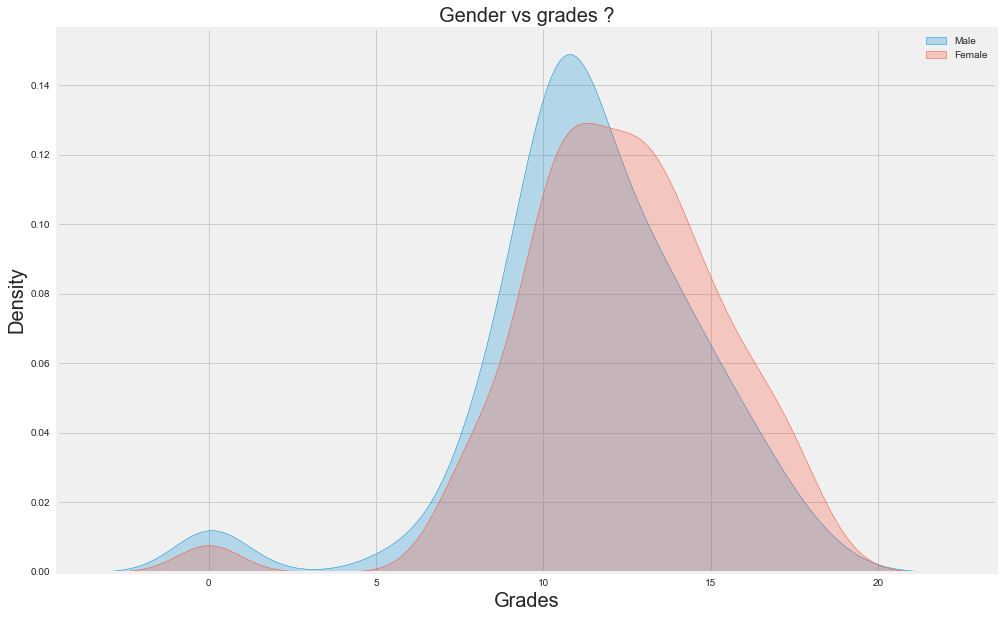

In [78]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(df.loc[df['sex'] == 'M', 'G3'], label='Male', shade = True)
sns.kdeplot(df.loc[df['sex'] == 'F', 'G3'], label='Female', shade = True)
ax.set_title('Gender vs grades ?', fontsize = 20)
ax.set_xlabel('Grades', fontsize = 20);
ax.set_ylabel('Density', fontsize = 20)
ax.legend()

# Do study more affects the grade?

Text(0, 0.5, 'G3')

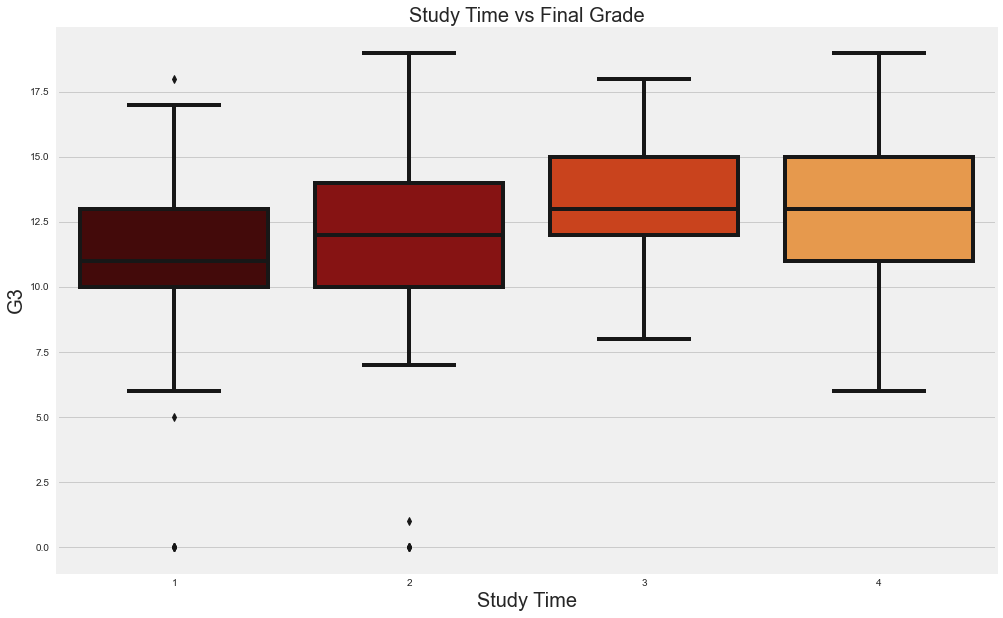

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x='studytime', y='G3',data=df,palette='gist_heat')
ax.set_title('Study Time vs Final Grade',fontsize = 20)
ax.set_xlabel('Study Time', fontsize = 20);
ax.set_ylabel('G3', fontsize = 20)

### It seams that people with study time belongs to group 3(5-10 hours) or group 4(>10 hours) will perform better in the final exams

Text(0, 0.5, 'G3')

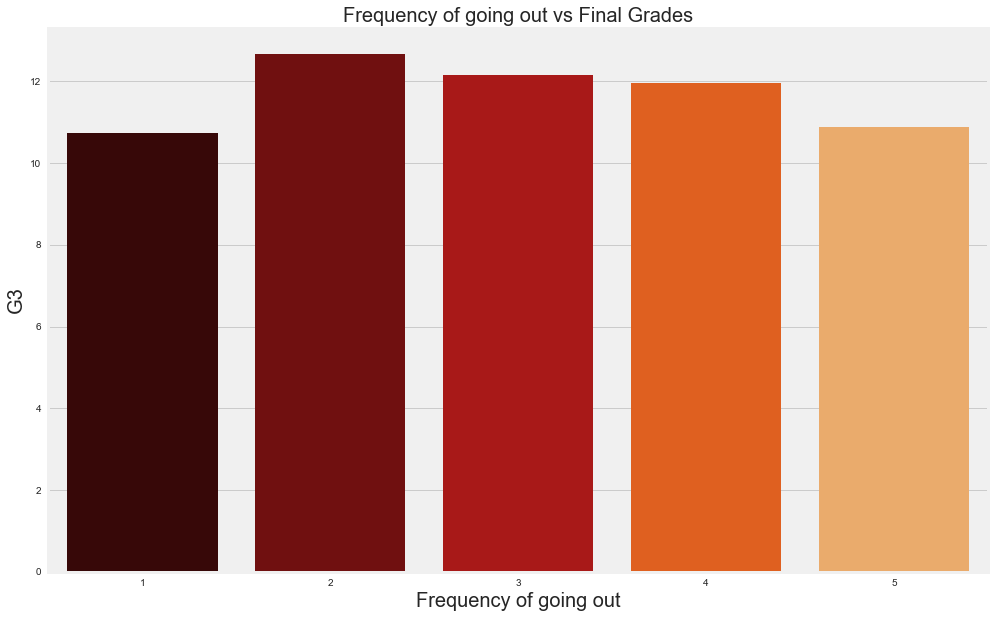

In [80]:
result = df.groupby('goout', as_index=False)['G3'].mean()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=result['goout'], y=result['G3'],data=result,palette='gist_heat')
ax.set_title('Frequency of going out vs Final Grades',fontsize = 20)
ax.set_xlabel('Frequency of going out', fontsize = 20);
ax.set_ylabel('G3', fontsize = 20)

## It seems that people who goes out less will have a higher mark although there is no difference between group 5(most frequently go out) and 1(least frequently go out)

# Study higher vs final grades

Text(0, 0.5, 'G3')

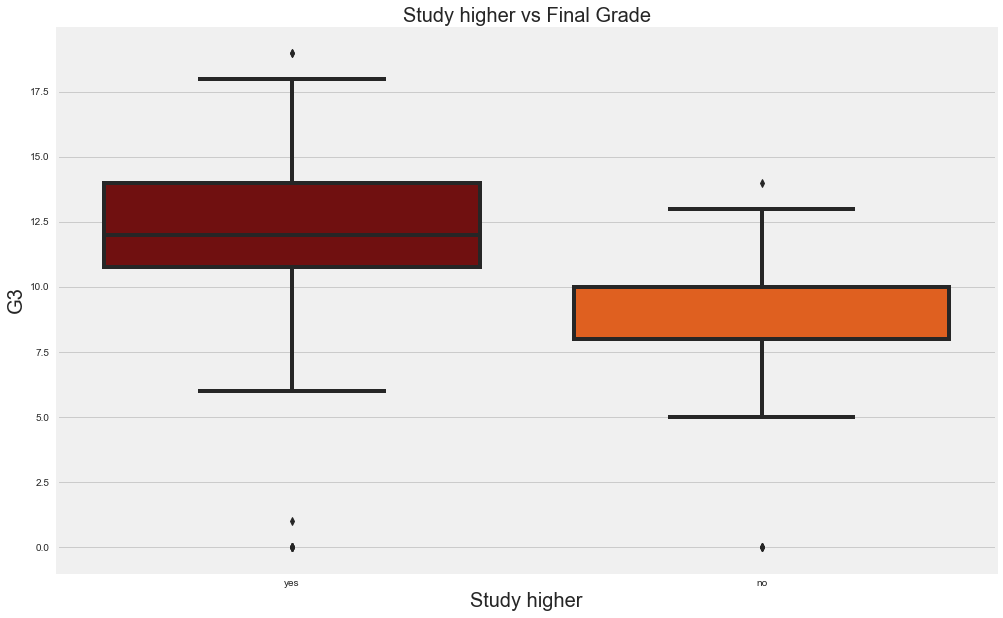

In [81]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x='higher', y='G3',data=df,palette='gist_heat')
ax.set_title('Study higher vs Final Grade',fontsize = 20)
ax.set_xlabel('Study higher', fontsize = 20);
ax.set_ylabel('G3', fontsize = 20)

### It is clearly that students who will pursue further study will have higher grades that who do not

# Does alcohol makes students get less score? (We will consider another plot)

Text(0, 0.5, 'G3')

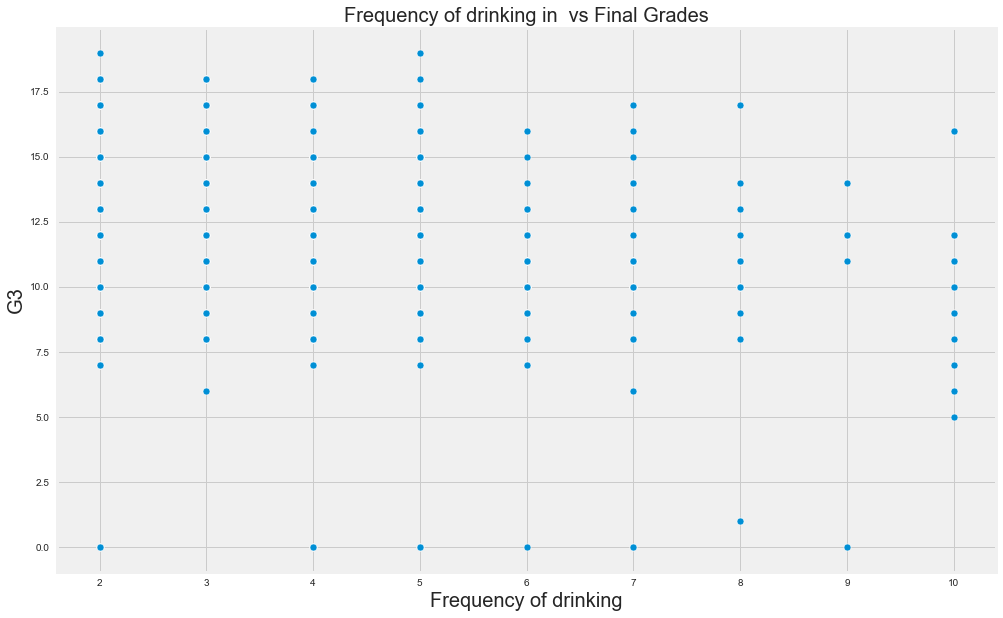

In [82]:
df['total_alcohol'] = df['Dalc']+df['Walc']
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x=df['total_alcohol'], y=df['G3'],data=df,palette='gist_heat')
ax.set_title('Frequency of drinking in  vs Final Grades',fontsize = 20)
ax.set_xlabel('Frequency of drinking', fontsize = 20);
ax.set_ylabel('G3', fontsize = 20)

# Number of students who are absences

Text(0, 0.5, 'number of students')

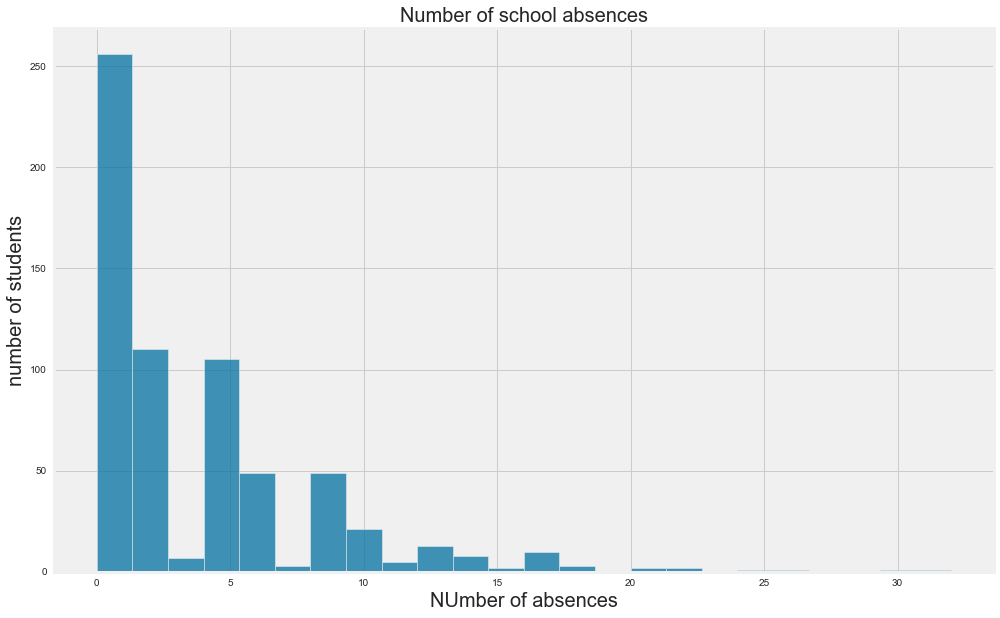

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(x=df['absences'], data=df,palette='gist_heat')
ax.set_title('Number of school absences',fontsize = 20)
ax.set_xlabel('NUmber of absences', fontsize = 20);
ax.set_ylabel('number of students', fontsize = 20)

### Most students have less than 10 days of absences

### Label encoder is only for numerical values. Therefore, this correlation will miss a lot of object features. So we will perform one hot encoding with all the object features

In [88]:
columns_object = list( df.select_dtypes( [ 'object' ] ) )
le = LabelEncoder()
df[ columns_object ] = df[ columns_object ].apply( lambda col: le.fit_transform( col ) )
print( df.head() )
print( df.columns )


   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0    0   18        1        0        0     4     4     0     4   
1       0    0   17        1        0        1     1     1     0     2   
2       0    0   15        1        1        1     1     1     0     2   
3       0    0   15        1        0        1     4     2     1     3   
4       0    0   16        1        0        1     3     3     2     2   

   reason  guardian  traveltime  studytime  failures  schoolsup  ...  paid  \
0       0         1           2          2         0          1  ...     0   
1       0         0           1          2         0          0  ...     0   
2       2         1           1          2         0          1  ...     0   
3       1         1           1          3         0          0  ...     0   
4       1         0           1          2         0          0  ...     0   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0      

# Check correlation and draw them using heatmap

In [89]:
df_correlated = abs(df.corr())['G3'].sort_values(ascending=False)
df_correlated

G3            1.000000
G2            0.918548
G1            0.826387
failures      0.393316
higher        0.332172
school        0.284294
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
address       0.167637
internet      0.150025
Mjob          0.148252
sex           0.129077
traveltime    0.127173
reason        0.124969
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
romantic      0.090583
goout         0.087641
guardian      0.079609
schoolsup     0.066405
famrel        0.063361
activities    0.059791
famsup        0.059206
paid          0.054898
Fjob          0.052953
famsize       0.045016
nursery       0.028752
Pstatus       0.000754
Name: G3, dtype: float64

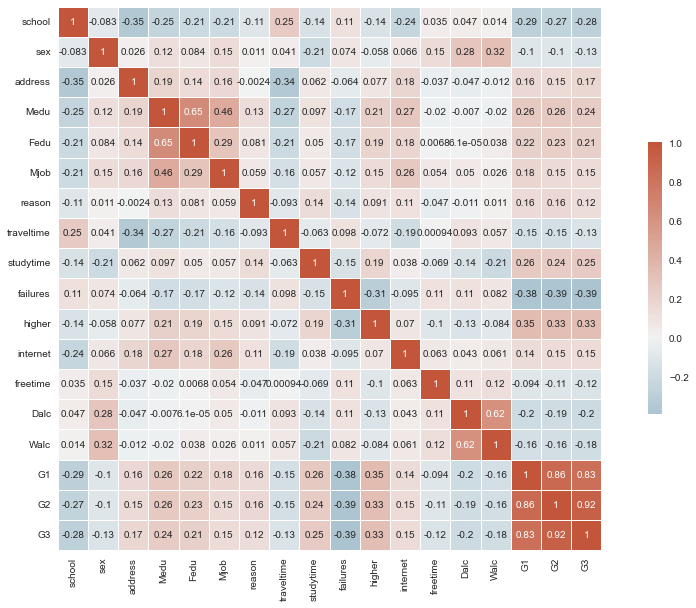

In [90]:
# Most correlated features
mat = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
top_corr_features = mat.index[abs(mat["G3"])>0.12]
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(df[top_corr_features].corr(), cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## From this heatmap, we can see that, number of past class failures, parent's education, studytime, alcohol consumption, goout, traveltime and ages are the 7 most correlated factors with G3. We will not consider G1 and G3 since they are strongly correlated with G2, including them may lead to overfitting. 

In [ ]:
corr_dict=mat['G3'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if (abs(value) >0.12 and  abs(value)<0.8):
        important_columns.append(key)
important_columns.append('G3')
important_columns

In [ ]:
df_final = df[important_columns]
df_final.head()

In [ ]:
Y = df_final['G3']
X = df_final.drop("G3", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

## We use standardscaler here

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# root mean squared_loss
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
# define some list here, we will put them in dataframe later
model_name_list = ['Ridge Regression', 'Lasso', 'ElasticNet Regression', 'RandomForestRegressor', 'GradientBoostRegressor', "XGBoostRegressor"]

# Trying Linear Regression model

In [ ]:
def linear_regression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"Root mean squared error: {(rmse):.4f}")
    
linear_regression()

In [ ]:
def regression_model(model, input_x, input_y):
    # prepare a range of alpha values to test
    alphas = np.arange(0.0005, 20, 0.001)
    param_grid = {'alpha':alphas}
    cv = KFold(10, shuffle=True, random_state = 42)
    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
    
    grid_search_regression = GridSearchCV(estimator=model,  
                         param_grid=(param_grid),
                         scoring=rmse_score,
                         cv = cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_regression.fit(input_x, input_y)
    best_parameters_regression = grid_search_regression.best_params_  
    best_score_regression = grid_search_regression.best_score_ 
    print("Best parameter:", best_parameters_regression)
    print(f"Best rsme score {(best_score_regression):.4f}")
    pred = grid_search_regression.best_estimator_.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"Root mean squared error in test set: {(rmse):.4f}")

models = [Ridge(random_state=42), Lasso(random_state=42), ElasticNet(random_state=42)]
for model in models:
    regression_model(model, X_train, y_train)

# Trying Tree Regression Model

In [ ]:
def tree_regression_model(model, input_x, input_y):
    # prepare a range of hyper parameters to tune in
    params = {'n_estimators': list(range(2, 40, 1)), 'max_features': ['auto', 'sqrt', 'log2'], 
         'min_samples_leaf': list(range(2, 40, 1))}
    cv = KFold(10, shuffle=True, random_state = 42)
    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_tree = GridSearchCV(estimator=model,  
                         param_grid=params,
                         scoring=rmse_score,
                         cv = cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_tree.fit(input_x, input_y)
    best_parameters_tree = grid_search_tree.best_params_  
    best_score_tree = grid_search_tree.best_score_ 
    print("Best parameter:", best_parameters_tree)
    print(f"Best rsme score: {(best_score_tree):.4f}")
    pred = grid_search_tree.best_estimator_.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"Root mean squared error: {(rmse):.4f}")

models = [RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42)]
for model in models:
    tree_regression_model(model, X_train, y_train)

In [ ]:
def xgboost_regression_model(input_x, input_y):
    # prepare a range of hyper parameters to tune in
    params ={"learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5], 
             "max_depth": list(range(2, 6, 1))}
    cv = KFold(10, shuffle=True, random_state = 42)
    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
    model = xg.XGBRegressor(objective="reg:squarederror", random_state = 42)
    grid_search_tree = GridSearchCV(estimator=model,  
                         param_grid=params,
                         scoring=rmse_score,
                         cv = cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_tree.fit(input_x, input_y)
    best_parameters_tree = grid_search_tree.best_params_  
    best_score_tree = grid_search_tree.best_score_ 
    print("Best parameter:", best_parameters_tree)
    print(f"Best rsme score: {(best_score_tree):.4f}")
    pred = grid_search_tree.best_estimator_.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"Root mean squared error: {(rmse):.4f}")

xgboost_regression_model(X_train, y_train)

# Blending models to get a better result

In [ ]:
preds_all = []
rmse_all = []
models = [Ridge(alpha=19.9995, random_state=42), Lasso(alpha=0.0885, random_state=42), ElasticNet(alpha=0.885, random_state=42), 
          RandomForestRegressor(n_estimators = 7, min_samples_leaf = 14, max_features = 'sqrt', random_state=42), 
          GradientBoostingRegressor(n_estimators = 39, min_samples_leaf = 2, max_features = 'log2', random_state=42), 
          xg.XGBRegressor(objective="reg:squarederror", learning_rate = 0.1, max_depth=2, random_state = 42)]
def predict(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    preds_all.append(pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    rmse_all.append(rmse)

for model in models:
    predict(model)


In [ ]:
print(rmse_all)

In [ ]:
a = np.arange(0.05, 1.00, 0.05)
rmse_ensemble = 3.4942
for i in a:
    for j in a:
        for k in a:
            for m in a:
                for n in a:
                    for p in a:
                        if (i+j+k+m+n+p)==1:
                            preds = preds_all[0]*i + preds_all[1]*j+ preds_all[2]*k + preds_all[3]*m + preds_all[4]*n + preds_all[5]*p
                            rmse_final = mean_squared_error(y_test, preds, squared=False)
                            if(rmse_final < rmse_ensemble):
                                rmse_ensemble = rmse_final
                                print(i, j, k, m, n, p)
                                print(rmse_ensemble)

In [ ]:
pred_ensemble = preds_all[0]*0.05+ preds_all[1]*0.05 + preds_all[2]*0.1 + preds_all[3]*0.05 +preds_all[4]*0.7 + preds_all[5]*0.05
rmse_ensemble = mean_squared_error(y_test, pred_ensemble, squared=False)
print(f"Root mean squared error: {(rmse_ensemble):.6f}")
preds_all.append(rmse_ensemble)
rmse_all.append(rmse_ensemble)

### 3.49411, breaking the 3.50 threshold, that's good

# Final prediction

In [ ]:
final_predict = preds_all[-1]*0.5+ preds_all[-2]*0.02 + preds_all[-4]*0.35 + preds_all[0]*0.13
rmse_final = mean_squared_error(y_test, final_predict, squared=False)
print(f"Root mean squared error: {(rmse_final):.6f}")
preds_all.append(final_predict)
rmse_all.append(rmse_final)

In [ ]:
print(model_name_list)
print(rmse_all)

In [ ]:
results = pd.DataFrame({'algorithm': model_name_list, 'rmse': rmse_all})
results

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.barplot(x=results['algorithm'], y=results['rmse'], data=results, palette='gist_heat')
ax.set_title('Root mean squared error ',fontsize = 15)
ax.set_xlabel('Algorithms', fontsize = 15);
ax.set_ylabel('RMSE', fontsize = 15)

### Final result: root mean squared error 3.4749, we will try as if we can lower the score